<a href="https://colab.research.google.com/github/EZzero7/Reconocimiento_perros_y_gatos/blob/main/Reconocimiento_perros_y_gatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
import pandas as pd

In [ ]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation= 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/perros y gatos/gatos_perros/training_set',
                                target_size=(150,150),
                                batch_size=32,
                                class_mode='binary'
                                )

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/perros y gatos/gatos_perros/test_set',
                                    target_size=(150,150),
                                    batch_size=32,
                                    class_mode='binary'
                                    )

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
checkpoint = ModelCheckpoint('nodel_perros_gatos.hdf5', monitor='val_accuracy', verbose= 1,save_best_only=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer= optimizers.Adam(),metrics=['accuracy'])

In [ ]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                 epochs=100,
                 validation_data=validation_generator,
                 validation_steps=1000//32,
                 callbacks=[checkpoint])

Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.6896 - accuracy: 0.5479
Epoch 1: val_accuracy improved from -inf to 0.51613, saving model to nodel_perros_gatos.hdf5
62/62 [==============================] - 516s 8s/step - loss: 0.6896 - accuracy: 0.5479 - val_loss: 0.6906 - val_accuracy: 0.5161
Epoch 2/100
61/62 [============================>.] - ETA: 2s - loss: 0.6816 - accuracy: 0.5517
Epoch 2: val_accuracy improved from 0.51613 to 0.62500, saving model to nodel_perros_gatos.hdf5
62/62 [==============================] - 289s 5s/step - loss: 0.6813 - accuracy: 0.5519 - val_loss: 0.6529 - val_accuracy: 0.6250
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6609 - accuracy: 0.6053
Epoch 3: val_accuracy improved from 0.62500 to 0.63911, saving model to nodel_perros_gatos.hdf5
62/62 [==============================] - 209s 3s/step - loss: 0.6609 - accuracy: 0.6053 - val_loss: 0.6368 - val_accuracy: 0.6391
Epoch 4/100
62/62 [=====================

In [ ]:
import matplotlib.pyplot as plt

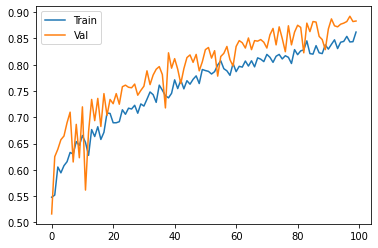

In [ ]:
plt.plot(hist.history['accuracy'],label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [ ]:
model.evaluate(validation_generator)

64/64 [==============================] - 11s 164ms/step - loss: 0.2835 - accuracy: 0.8774


[0.28353065252304077, 0.877409815788269]